In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns

In [121]:
clean_data = pd.read_csv('clean_data.csv')
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding='latin1', header =None)

In [122]:
clean_data.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,0,saat semua cowok usaha lacak perhati gue loe l...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,1,siapa yang telat ngasih tau elu edan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,2,kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,3,aku itu aku nku tau mata sipit tapi liat dari ...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,4,kaum cebong kapir udah liat dongok dari awal t...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [123]:
kamus_alay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [124]:
kamus_alay = kamus_alay.rename(columns={
    0:'original',
    1:'replace'
})

In [125]:
alay_dict = dict(zip(kamus_alay['original'], kamus_alay['replace']))

In [126]:
alay_dict = dict(zip(kamus_alay['original'], kamus_alay['replace']))

In [127]:
def remove_kata_alay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])

In [128]:
for text in clean_data['Tweet']:
    print(remove_kata_alay(text))

saat semua cowok usaha lacak perhati gue kamu lantas remeh perhati yang gue kasih khusus ke kamu basic kamu cowok bego
siapa yang telat memberi tau kamu edan sarap gue gaul dengan ciga ifla cal sama siapa itu licew juga
kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh kali kali kadang aku rasa tuhan itu meninggalkan aku sendiri ketika orang tuaku rencana pisah ketika kakak lebih pilih jadi kristen ketika aku anak ter
aku itu aku ku tau mata sipit tapi lihat dari mana itu aku
kaum cebong kafir sudah lihat dungu dari awal tambah dungu lagi haha
ya bani taplak dan kawan kawan
deklarasi pilihan kepala daerah aman dan anti hoa arga dukuh sari jabon
gue baru saja selesai re watch aldnoah zero paling kampret memang akhirnya karakter utama cowoknya kena friendzone bro uniform resource locator
nah admin belanja satu lagi port baik nak makan ais kepal milo ais kepal horlicks atau cendol toping kau kau doket mana itu gerai rozak mertua taipan depan kembar baby amp 

AttributeError: 'float' object has no attribute 'split'

In [129]:
clean_data.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,0,saat semua cowok usaha lacak perhati gue loe l...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,1,siapa yang telat ngasih tau elu edan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,2,kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,3,aku itu aku nku tau mata sipit tapi liat dari ...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,4,kaum cebong kapir udah liat dongok dari awal t...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [130]:
def kelompok (HS):
    if (HS == 1):
        return 'YES'
    elif (HS == 0):
        return 'NO'

def kelompok (Abusive):
    if (Abusive == 1):
        return 'YES'
    elif(Abusive == 0):
        return 'NO'

clean_data['Tipe HS'] = clean_data['HS'].apply(lambda x: kelompok(x))
clean_data['Tipe Abusive'] = clean_data['Abusive'].apply(lambda x: kelompok(x))

In [131]:
clean_data.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,Tipe HS,Tipe Abusive
0,0,saat semua cowok usaha lacak perhati gue loe l...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,YES,YES
1,1,siapa yang telat ngasih tau elu edan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,NO,YES
2,2,kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,254,37,NO,NO
3,3,aku itu aku nku tau mata sipit tapi liat dari ...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,NO,NO
4,4,kaum cebong kapir udah liat dongok dari awal t...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,YES,YES


***Tipe Hate Speech & Abusive***

In [132]:
clean_data['Tipe HS'].value_counts()

NO     7526
YES    5518
Name: Tipe HS, dtype: int64

In [133]:
clean_data['Tipe Abusive'].value_counts()

NO     8039
YES    5005
Name: Tipe Abusive, dtype: int64

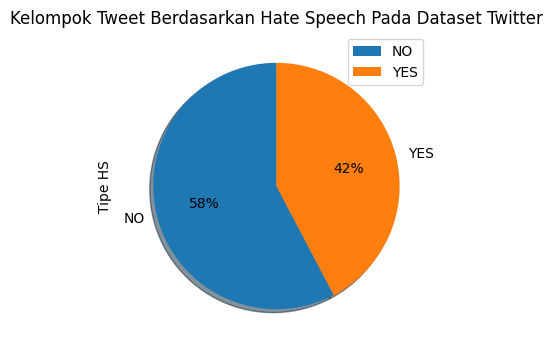

In [134]:
clean_data['Tipe HS'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.f%%', startangle=90, shadow=True)

plt.legend(['NO', 'YES'])
plt.title('Kelompok Tweet Berdasarkan Hate Speech Pada Dataset Twitter')

plt.show()


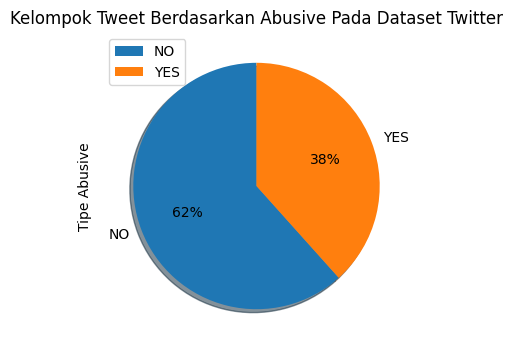

In [135]:
clean_data['Tipe Abusive'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.f%%', startangle=90, shadow=True)

plt.legend(['NO', 'YES'])
plt.title('Kelompok Tweet Berdasarkan Abusive Pada Dataset Twitter')

plt.show()


***Hate Speech Berdasarkan Kekuatannya***

In [136]:
clean_data.loc[:,"HS_Weak":"HS_Strong"].sum()

HS_Weak        3348
HS_Moderate    1698
HS_Strong       472
dtype: int64

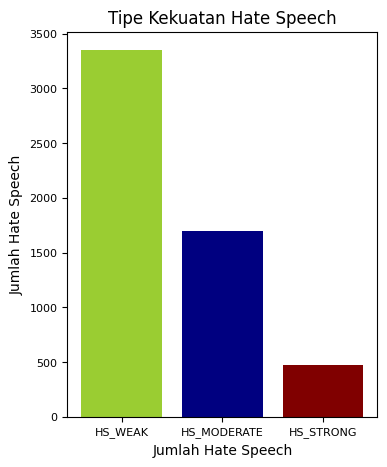

In [137]:
Tipe_Kekuatan_HS = ('HS_WEAK', 'HS_MODERATE', 'HS_STRONG')
Jumlah_HS = (3348, 1698, 472)
my_color = 'yellowgreen', 'navy', 'maroon'

plt.figure(figsize=(4,5))
plt.bar(Tipe_Kekuatan_HS, Jumlah_HS, color=my_color)


plt.title('Tipe Kekuatan Hate Speech', size=12)
plt.ylabel('Jumlah Hate Speech', size=10)
plt.xlabel('Jumlah Hate Speech', size=10)
plt.xticks(size=8)
plt.yticks(size=8)

plt.show()

***Hate Speech berdasarkan Kelompok***

In [138]:
clean_data.loc[:,"HS_Individual":"HS_Group"].sum()

HS_Individual    3540
HS_Group         1978
dtype: int64

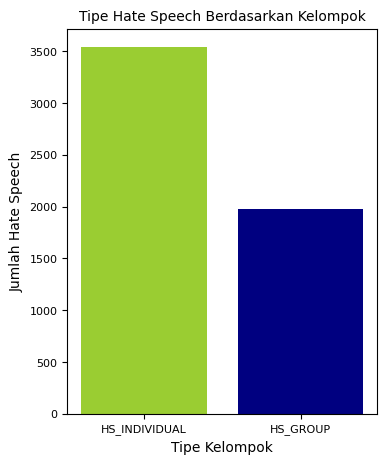

In [139]:
Tipe_Kelompok_HS = ('HS_INDIVIDUAL', 'HS_GROUP')
Jumlah_HS = (3540, 1978)
my_color = 'yellowgreen', 'navy',

plt.figure(figsize=(4,5))
plt.bar(Tipe_Kelompok_HS, Jumlah_HS, color=my_color)


plt.title('Tipe Hate Speech Berdasarkan Kelompok', size=10)
plt.ylabel('Jumlah Hate Speech', size=10)
plt.xlabel('Tipe Kelompok', size=10)
plt.xticks(size=8)
plt.yticks(size=8)

plt.show()

***Hate Speech Berdasarkan Jenis***

In [ ]:
"Religion", "Race", "Physical", "Gender", "Other"

In [140]:
clean_data.loc[:,"HS_Religion":"HS_Other"].sum()

HS_Religion     789
HS_Race         563
HS_Physical     322
HS_Gender       304
HS_Other       3706
dtype: int64

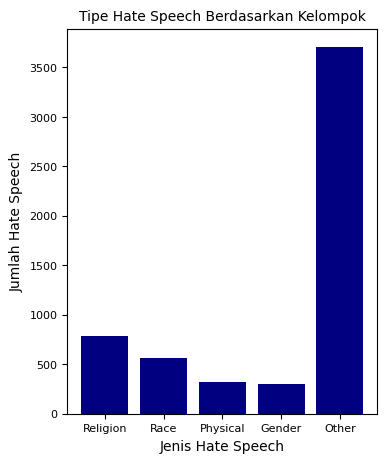

In [141]:
Jenis_HS = ("Religion", "Race", "Physical", "Gender", "Other")
Jumlah_HS = (789, 563, 322, 304, 3706)
my_color = 'navy'

plt.figure(figsize=(4,5))
plt.bar(Jenis_HS, Jumlah_HS, color=my_color)


plt.title('Tipe Hate Speech Berdasarkan Kelompok', size=10)
plt.ylabel('Jumlah Hate Speech', size=10)
plt.xlabel('Jenis Hate Speech', size=10)
plt.xticks(size=8)
plt.yticks(size=8)

plt.show()

***KATA YANG SERING DIGUNAKAN***

In [162]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='black')

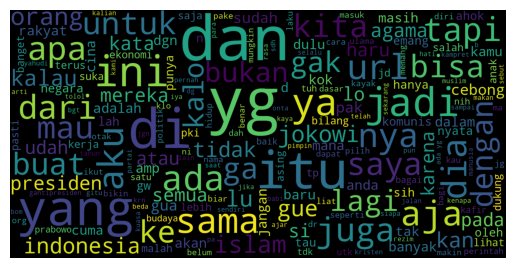

In [170]:
text =' '.join(map(str, clean_data['Tweet']))
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()